*Baseline model*: predict the last value.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def smape(predictions, actual):
    difference = np.absolute(actual-predictions)
    summation = actual+predictions
    error = 100/len(predictions)*np.sum(2*difference/summation)
    return error

In [6]:
list_of_names = ["linear1_abrupt", "linear2_abrupt", "linear3_abrupt",
                "nonlinear1_abrupt", "nonlinear2_abrupt", "nonlinear3_abrupt",
                "linear1_inc", "linear2_inc", "linear3_inc",
                "nonlinear1_inc", "nonlinear2_inc", "nonlinear3_inc"]
#dictionary to store smape for every dataset
smape_dict = {}

SMAPE: -28.7142


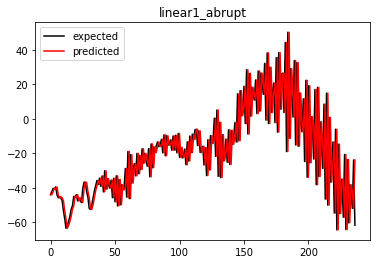

SMAPE: -4.3939


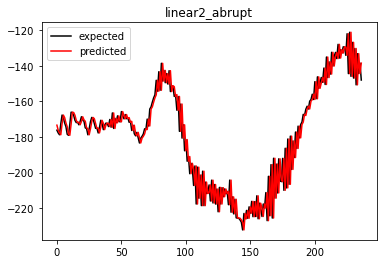

SMAPE: 20.0008


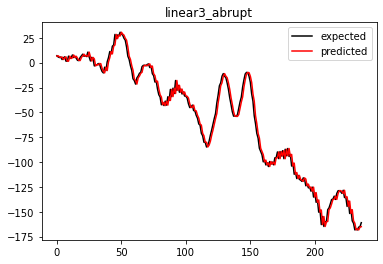

SMAPE: -170.1139


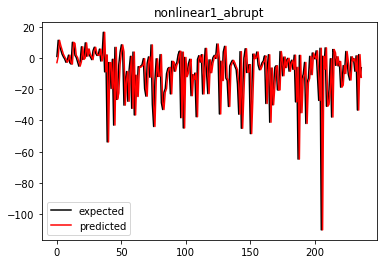

SMAPE: 19.9143


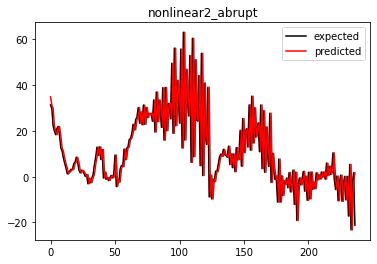

SMAPE: 60.0594


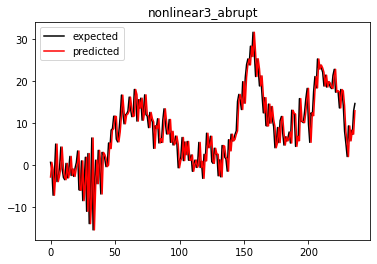

SMAPE: -89.0883


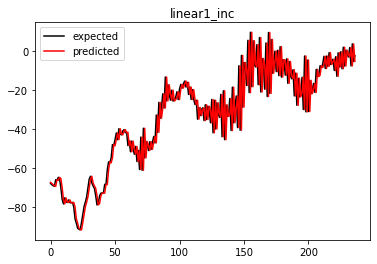

SMAPE: 123.0501


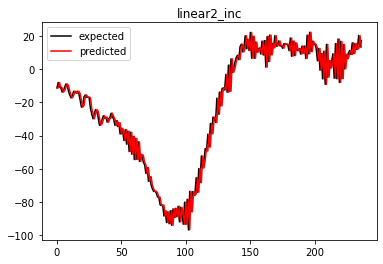

SMAPE: 4.7044


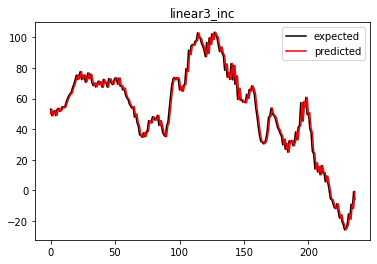

SMAPE: 85.4178


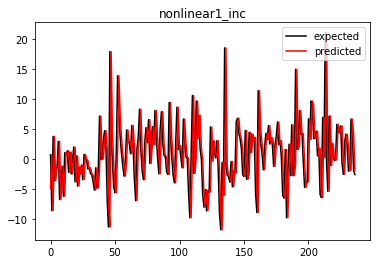

SMAPE: -1.4260


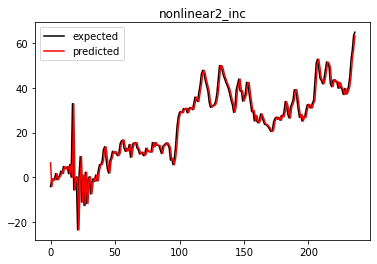

SMAPE: -383.5944


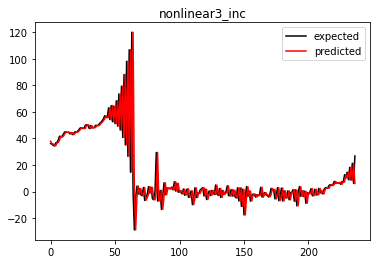

In [8]:
for name in list_of_names:
    file_path = "data/"+name
    data = pd.read_csv(file_path)

    ground_truth = data.loc[int(0.7*len(data)):, "t"].reset_index(drop = True)
    predictions = data.loc[int(0.7*len(data)):, "t-1"].reset_index(drop = True)
    

    error = smape(predictions.values.reshape([-1,1]), ground_truth.values.reshape([-1,1]))
    smape_dict[name] = error
    print("SMAPE: {:.4f}".format(error))
    
    plt.plot(ground_truth, label = "expected", color = "black")
    plt.plot(predictions, label = "predicted", color = "red")
    plt.title(name)
    plt.legend()    
    plt.show()